การควบคุมเหมาะที่สุดและการเรียนรูู้เสริมกำลัง -- ดร.วโรดม ตู้จินดา

# 5 แนววิถีเหมาะที่สุดแบบไม่เป็นเชิงเส้น

จากบทที่ 4 เราได้ศึกษาการโปรแกรมพลวัตขั้นพื้นฐานสำหรับระบบเชิงเส้นที่เป็นคอนเวกซ์ โดยยกตัวอย่างตัวควบคุม MPC 
แบบคอนเวกซ์ เมื่อจัดรูปเป็นปัญหา QP สามารถหาคำตอบเหมาะที่สุดได้ภายในคาบเวลาที่สั้น 
ทำให้ปัจจุบันมีการใช้งานอย่างแพร่หลายในหุ่นยนต์และอุตสาหกรรมยานยนต์

ในบทนี้จะขยายไปยังปัญหาทั่วไปที่พลวัตไม่เป็นเชิงเส้น 
และไม่คอนเวกซ์ แต่ก่อนจะเข้าสู่เนื้อหา เราเน้นย้ำว่าหากการประมาณค่าเป็นพลวัตเชิงเส้นทำงานได้ดี 
การใช้การควบคุม LQR หรือ MPC จะรับประกันการลู่เข้าสู่คำตอบภายในเวลาที่กำหนดได้ 
และมีขั้นตอนการแก้ปัญหาเพื่อหาคำตอบอย่างเป็นระบบ ในขณะที่วิธีการไม่เป็นเชิงเส้นที่จะได้ศึกษาต่อไปนี้ 
ไม่มีการรับประกันการลู่เข้าสู่ค่าเหมาะที่สุด โดยอาจลู่เข้าสู่ค่าต่ำสุดเฉพาะที่ หรือเราอาจจำเป็นต้องหยุดอัลกอริทึมก่อนกำหนดเพื่อได้เอาต์พุตตัวควบคุมภายในคาบเวลาที่กำหนด 
เรียกว่าเป็นคำตอบเกือบเหมาะที่สุด (sub-optimal) อย่างไรก็ตาม วิธีหาแนววิถีเหมาะที่สุดแบบไม่เป็นเชิงเส้น (nonlinear optimal trajectory) สามารถใช้งานได้ดี เพียงต้องใช้ความพยายามมากขึ้น 

## 5.1 การหาแนววิถีเหมาะที่สุดโดยอ้อม

วิธีการแรกที่จะกล่าวถึงเรียกว่า การโปรแกรมพลวัติเชิงอนุพันธ์ (differential dynamic programming เรียกย่อว่า DDP) [1,2]
ที่มีความคล้ายกับวิธีคุมค่ากำลังสองเชิงเส้นทำซ้ำ (iterative linear quadratic regulator เรียกย่อว่า iLQR) โดยหลักการจะแตกต่างกันในรายละเอียดปลีกย่อยที่ได้กล่าวถึงในบทที่ 2 กล่าวคือวิธี DDP ประยุกต์ใช้อัลกอริทึมนิวตันโดยตรง ส่วนวิธี iLQR ใช้อัลกอริทึมเกาส์-นิวตันเพื่อทำให้การคำนวณง่ายขึ้นทำให้ทำงานเร็วกว่า อย่างไรก็ตามในบทความและงานวิจัยพบว่ามีการใช้สองชื่อนี้ปะปนกันโดยไม่คำนึงถึงความแตกต่าง ดังนั้นเราจะใช้ตัวย่อ DDP เป็นหลักในเนื้อหาของบทนี้

วิธีการนี้จัดอยู่ในประเภทการหาแนววิถีเหมาะที่สุดโดยอ้อม (indirect trajectory optimization) โดยหากเปรียบเทียบกับวิธีการยิงโดยอ้อมในบทที่ 3 ซึ่งเป็นการลดค่าเกรเดียนต์ หรือรูปแบบอันดับหนึ่ง  วิธีการนี้จะมีพื้นฐานอยู่บนวิธีนิวตันคือมีรูปแบบอันดับสอง

**หมายเหตุ :** สัญกรณ์ที่ใช้จะอ้างอิงตามรายวิชา [3] ส่วนที่แตกต่างจากบทที่ 4 คือใช้ $l_k(x_k,u_k)$ และ $l_N(x_N)$ แทนมูลค่าขั้นและมูลค่าขั้นสุดท้ายตามลำดับ $V_k(x)$ แทนมูลค่ารายทาง และ $S_k(x,u)$ แทนฟังก์ชันตัวกระทำ-มูลค่า​ (action-value function นิยมเรียกว่าฟังก์ชัน $\mathcal{Q}$ แต่เหตุผลที่ใช้ $S_k$ เพื่อหลีกเลี่ยงการซ้ำกับเมทริกซ์น้ำหนัก $Q$ ในฟังก์ชันมูลค่า) 

เราจะเริ่มต้นจากปัญหาที่ไม่มีเงื่อนไขบังคับอสมการ รูปแบบปัญหาการหาแนววิถีเหมาะที่สุดแบบไม่เป็นเชิงเส้นเขียนได้เป็นดังนี้

$$
\begin{align*}
\underset{\substack{x_{1:N} \\ u_{1:N-1}}}{min} \; J &=  \sum_{k=1}^{N-1} \; l_k(x_k,u_k) + l_N(x_N) \\
s.t. \;\; x_{k+1} &= f(x_k,u_k) \\
x_k &\in \mathcal{X}_k \\
u_k &\in \mathcal{U}_k \tag{5.1}
\end{align*}
$$

โดยที่พลวัต $f(x_k,u_k)$ ไม่เป็นเชิงเส้น และเงื่อนไขบังคับสำหรับ $x_k, u_k$ ไม่เป็นคอนเวกซ์ โดยทั่วไปจะตั้งสมมุติฐานว่าฟังก์ชันมูลค่าและเงื่อนไขบังคับเป็นแบบอย่างน้อย $\mathcal{C}^2$ คือสามารถหาอนุพันธ์ได้ถึงอันดับสอง

วิธีการ DDP มีพื้นฐานอยู่บนวิธี DP แบบประมาณค่า โดยใช้การกระจายเทเลอร์อันดับสองของฟังก์ชันมูลค่ารายทางใน DP เพื่อคำนวณขั้นนิวตัน การทำงานสามารถลู่เข้าได้เร็ว หรืออาจหยุดก่อนหน้าในการใช้งานแบบเรียลไทม์

จากฟังก์ชันมูลค่ารายทาง สามารถประมาณค่าโดยกระจายเทเลอร์ได้ดังนี้

$$
V_k(x + \Delta x) \approx V_k(x) + p_k^T\Delta x + \frac{1}{2}\Delta x^T P_k \Delta x \tag{5.2}
$$

โดยนิยาม
$$
p_N = \nabla_x l_N(x) \tag{5.3}
$$
$$
P_N = \nabla_{xx}^2 l_N(x) \tag{5.4}
$$

สังเกตข้อแตกต่างระหว่าง (5.2) กับปัญหา LQR เชิงเส้นก่อนหน้านี้คือมีพจน์สัมพรรค $p_k^T\Delta x$ เป็นเกรเดียนต์ของฟังก์ชันมูลค่าขั้นเพิ่มเข้ามา

ต่อมาพิจารณาฟังก์ชันตัวกระทำ-มูลค่า 
$$
S_k(x,u) = l_k(x,u) + V_{k+1}(f(x,u)) \tag{5.5}
$$

เมื่อประมาณค่าโดยกระจายเทเลอร์จะได้เป็น
$$
S_k(x+\Delta x, u+\Delta u) \approx S_k(x,u) + 
\left[\begin{array}{c}
g_x \\
g_u
\end{array}\right]^T
\left[\begin{array}{c}
\Delta x \\
\Delta u
\end{array}\right] + \frac{1}{2}
\left[\begin{array}{c}
\Delta x \\
\Delta u
\end{array}\right]^T 
\left[\begin{array}{cc}
G_{xx} & G_{xu} \\
G_{ux} & G_{uu}
\end{array}\right]
\left[\begin{array}{c}
\Delta x \\
\Delta u
\end{array}\right] \tag{5.6}
$$
โดยเมทริกซ์ในพจน์ด้านขวา (เฮสเชียน) เป็นแบบสมมาตร $G_{ux} = G_{xu}^T$ 

ต้องการแทนค่าย้อนหลังในวิธี DP มูลค่ารายทางย้อนหลังหนึ่งขั้นเวลามีค่าเป็น

$$
\begin{align*}
V_{k-1}(x) = \underset{\Delta u}{min} \;\Big[ & S_{k-1}(x,u) + g_x^T\Delta x + g_u^T \Delta u \\
&+ \frac{1}{2}\Delta x^TG_{xx}\Delta x + \frac{1}{2}\Delta u^TG_{uu}\Delta u \\ 
&+ \frac{1}{2}\Delta x^TG_{xu}\Delta u + \frac{1}{2}\Delta u^TG_{ux}\Delta x \Big] \tag{5.7} 
\end{align*}
$$

หาเกรเดียนต์เทียบกับ $\Delta u$ และให้เท่ากับศูนย์ 
$$
\nabla_{\Delta u}[V_{k-1}(x)] = g_u + G_{uu}\Delta u + G_{ux}\Delta x = 0 \tag{5.8}
$$

จาก (5.8) สามารถหาคำตอบของ $\Delta u$ เป็นฟังก์ชันของพจน์ที่เหลือโดยการจัดรูปสมการได้เป็น
$$
\begin{align*}
\Delta u_{k-1} &= - G_{uu}^{-1}g_u - G_{uu}^{-1}G_{ux}\Delta x \\
&\triangleq -d_{k-1} - K_{k-1} \Delta x \tag{5.9}
\end{align*}
$$

โดยนิยาม $d_{k-1}$ คือพจน์ป้อนข้างหน้า​ (feedforward) ซึ่งเป็นค่าคงที่ และ $K_{k-1}$  คือพจน์ป้อนกลับ (feedback) แทนค่า (5.9) ลงใน $S_{k-1}$ เพื่อได้ $V_{k-1}(x + \Delta x)$ 
$$
\begin{align*}
V_{k-1}(x + \Delta x) & \approx V_{k-1}(x) + g_x^T\Delta x + g_u^T (-d_{k-1} - K_{k-1} \Delta x) \\
&+ \frac{1}{2}\Delta x^TG_{xx}\Delta x + \frac{1}{2}(-d_{k-1} - K_{k-1} \Delta x)^TG_{uu}(-d_{k-1} - K_{k-1} \Delta x) \\ 
&+ \frac{1}{2}\Delta x^TG_{xu}(-d_{k-1} - K_{k-1} \Delta x) + \frac{1}{2}(-d_{k-1} - K_{k-1} \Delta x)^TG_{ux}\Delta x  \tag{5.10} 
\end{align*}
$$

ดังนั้น $P_{k-1}$ และ $p_{k-1}$ ที่นิยามใน (5.2) จะได้เป็นดังนี้
$$
P_{k-1} = G_{xx} + K_{k-1}^TG_{uu}K_{k-1} - G_{xu}K_{k-1} - K_{k-1}^TG_{ux} \tag{5.11}
$$
$$
p_{k-1} = g_x - K_{k-1}^Tg_u + K_{k-1}^TG_{uu}d_{k-1} - G_{xu}d_{k-1} \tag{5.12}
$$


จากฟังก์ชันตัวกระทำ-มูลค่า (5.5) โดยอาศัยกลเม็ดที่อธิบายในหัวข้อ B.2 ของภาคผนวก B ในการหาอนุพันธ์ จะได้ว่า

$$
\begin{align*}
\frac{\partial S}{\partial x} &= \frac{\partial l_k}{\partial x} + \frac{\partial V}{\partial f}\frac{\partial f}{\partial x} \\
\Rightarrow g_x &= \nabla_x l_k + A_k^Tp_{k+1} \tag{5.13}
\end{align*}
$$
$$
\begin{align*}
\frac{\partial S}{\partial u} &= \frac{\partial l_k}{\partial u} + \frac{\partial V}{\partial f}\frac{\partial f}{\partial u} \\
\Rightarrow g_u &= \nabla_u l_k + B_k^Tp_{k+1} \tag{5.14}
\end{align*}
$$

และ
$$
G_{xx} = \frac{\partial g_x}{\partial x} = \nabla_{xx}^2l_k + A_k^TP_{k+1}A_k + 
(p_{k+1} \otimes I)T\frac{\partial A_k}{\partial x} \tag{5.15}
$$
$$
G_{uu} = \frac{\partial g_u}{\partial u} = \nabla_{uu}^2l_k + B_k^TP_{k+1}B_k + 
(p_{k+1} \otimes I)T\frac{\partial B_k}{\partial u} \tag{5.16}
$$
$$
G_{xu} = \frac{\partial g_x}{\partial u} = \nabla_{xu}^2l_k + A_k^TP_{k+1}B_k + 
(p_{k+1} \otimes I)T\frac{\partial A_k}{\partial u} \tag{5.17}
$$
โดย $T$ คือเมทริกซ์สลับเปลี่ยนที่นิยามในหัวข้อ B.2 ภาคผนวก B 

**หมายเหตุ :** กรณีใช้วิธีเกาส์-นิวตัน (iLQR) จะลดความซับซ้อนในการคำนวณโดยละทิ้งพจน์สุดท้ายของ (5.15) - (5.17)

**ตัวอย่าง 5.1** 

หุ่นยนต์กายกรรม (acrobot) [1] เป็นชื่อเรียกแขนกลในระนาบที่มีตัวขับเคลื่อนอยู่ที่ข้อศอกเพียงตัวเดียวดังแสดงในรูปที่ 5.1 
ชื่อภาษาอังกฤษได้มาจากการเคลี่อนที่ที่คล้ายกับนักกายกรรมโหนบาร์คู่ (acrobat) ที่ใช้แรงจากสะโพกเพื่อเหวี่ยงตัวขึ้นสู่ตำแหน่งแนวดิ่งด้านบน 
และทรงตัวอยู่ในตำแหน่งนั้น เป็นตัวอย่างหนึ่งของระบบที่ถูกกระตุ้นไม่เต็มที่ (underactuated) 
และยังมีความสำคัญเพราะพลวัตมีความคล้ายกับโมเดลอย่างง่ายในการเดินของหุ่นยนต์

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch5_acrobot.png" width=700 />

รูปที่ 5.1 หุ่นยนต์กายกรรม

ในตัวอย่างนี้จะใช้วิธี DDP เพื่อหาแนววิถีเหมาะที่สุดของหุ่นยนต์กายกรรมจากตำแหน่งเริ่มต้น 
คือเมื่อแขนทั้งสองชี้ลงในแนวดิ่งอันเป็นจุดสมดุลที่เสถียร 
ไปยังตำแหน่งสุดท้ายคือแขนทั้งสองเหยียตตรงชี้ขึ้นในแนวดิ่ง 
ลักษณะเหมือนการทรงตัวของนักกายกรรมในตำแหน่งหัวกลับ 

นำเข้าไลบรารีที่ต้องการใช้ 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.linalg import solve,inv
from scipy.linalg import block_diag, kron
from pydrake import forwarddiff
from pydrake.autodiffutils import AutoDiffXd, ExtractGradient, ExtractValue, InitializeAutoDiff

เนื่องจากการหาอนุพันธ์อัตโนมัติสำหรับพลวัตของหุ่นยนต์กายกรรมไม่สามารถใช้เครื่องมือพื้นฐานของ 
drake จึงต้องมีการนำเข้าเครื่องมือเสริมสำหรับจัดการกับโครงสร้างข้อมูลในรูป AutoDiffXd 

เมื่อนิยามสถานะ $x = [\theta_1, \;\theta_2, \;\dot{\theta}_1, \;\dot{\theta}_2]$ และอินพุต 
$u$ เป็นค่าแรงบิดของข้อต่อ 2 พลวัตหุ่นยนต์สามารถเขียนเป็นฟังก์ชัน acrobot_dynamics() ได้ดังนี้ โดยละเว้นรายละเอียดการอนุพัทธ์ 
ผู้สนใจอาจศึกษาเพิ่มเติมได้จาก [5]

**หมายเหตุ :** นอกจากการคำนวณพลวัตแล้ว ยังเพิ่มโค้ดสำหรับจัดการกับ forwarddiff ของ Drake 
ตามที่ได้อธิบายในภาคผนวก C ทำให้ฟังก์ชันมีความยาวขึ้น

In [2]:
def acrobot_dynamics(x, u):
    g = 9.81
    m1 = m2 = 1.0
    l1 = l2 = 1.0
    J1 = J2 = 1.0
    theta1 = x[0]
    theta2 = x[1]
    theta1dot = x[2]
    theta2dot = x[3]
    s1 = np.sin(theta1)
    c1 = np.cos(theta1)
    s2 = np.sin(theta2)
    c2 = np.cos(theta2)
    c12 = np.cos(theta1 + theta2)

    # mass matrix
    m11 = (m1*l1*l1 + J1 + m2*(l1*l1 + l2*l2 + 2*l1*l2*c2) + J2)
    m12 = (m2*(l2*l2 + l1*l2*c2 + J2))
    m22 = (l2*l2*m2 + J2)

    if isinstance(m11,AutoDiffXd):  # avoid error
        M = np.array([[m11,m12],[ m12,m22]])
    else:
        M = np.array([[m11.item(), m12.item()],[ m12.item(), m22]])
    
    # bias term
    tmp = l1*l2*m2*s2
    b1 = -(2*theta1dot*theta2dot + theta2dot**2)*tmp
    b2 = tmp * theta1dot**2
    B = np.array([b1, b2]).reshape(2,1)

    # friction
    c = 1.0
    C = np.array([c*theta1dot, c*theta2dot]).reshape(2,1)

    # gravity term
    g1 = ((m1 + m2)*l2*c1 + m2*l2*c12) * g
    g2 = m2*l2*c12*g
    G = np.array([g1, g2]).reshape(2,1)

    # equations of motion
    tau = np.array([0, u]).reshape(2,1)
    b = tau - B - G - C
    if not adflag: # not called from forwarddiff
        thetaddot = solve(M,b)
        y = np.array([theta1dot.item(), theta2dot.item(), thetaddot[0].item(), thetaddot[1].item()]).reshape(4,1)
    else:  # this part is to handle drake's forwarddiff properly
        M_value = ExtractValue(M)
        b_value = ExtractValue(b)
        y0 = ExtractGradient(x)[2,:]
        y1 = ExtractGradient(x)[3,:]
        M_grad = ExtractGradient(M)
        b_grad = ExtractGradient(b)
        thetaddot_value = solve(M_value,b_value)
        theta1dot_value = ExtractValue(x)[2].item()
        theta2dot_value = ExtractValue(x)[3].item()
        y_value = [theta1dot_value, theta2dot_value, thetaddot_value[0].item(), thetaddot_value[1].item()]        
        if adflag==1: # Jacobian w.r.t x
            ys = np.array([y_value[2], y_value[3]]).reshape(2,1)
            ygs_c1 = inv(M_value)@(b_grad[:,[0]] - M_grad[:,0].reshape(2,2)@ys)
            ygs_c2 = inv(M_value)@(b_grad[:,[1]] - M_grad[:,1].reshape(2,2)@ys)
            ygs_c3 = inv(M_value)@(b_grad[:,[2]] - M_grad[:,2].reshape(2,2)@ys)
            ygs_c4 = inv(M_value)@(b_grad[:,[3]] - M_grad[:,3].reshape(2,2)@ys)
            y23 = np.hstack((ygs_c1,ygs_c2,ygs_c3, ygs_c4))                            
            y_grad = np.vstack((y0,y1,y23))
            y = InitializeAutoDiff(y_value, y_grad)
        else: # derivative w.r.t u
            ygs = inv(M_value)@ b_grad
            y_grad = np.vstack((np.zeros((2,1)),ygs))
            y = InitializeAutoDiff(y_value,y_grad)
    return y

โดยวิธีการเหมือนที่ใช้ในบทที่ 4 สร้างฟังก์ชัน acrobot_dynamics_rk4() เพื่อคำนวณปริพันธ์โดยวิธีรุงเงอ คุททา (RK4) 
ใช้ร่วมกับการหาอนุพันธ์อัตโนมัติเพื่อประมาณค่าเชิงเส้นแบบดีสครีต 

In [3]:
def acrobot_dynamics_rk4(x,u):
    #RK4 integration with zero-order hold on u
    x_1 = x
    f1 = acrobot_dynamics(x, u)
    
    x_a = x.reshape(4,1)
    x_2 = x_a + 0.5*h*f1
    f2 = acrobot_dynamics(x_2.flatten(), u)
    
    x_3 = x_a + 0.5*h*f2
    f3 = acrobot_dynamics(x_3.flatten(), u)

    x_4 = x_a + 0.5*h*f3
    f4 = acrobot_dynamics(x_4.flatten(), u)

    ft = x_a + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
    
    return ft

ดังเช่นที่อธิบายในภาคผนวก C ในการคำนวณอนุพันธ์อัตโนมัติเพื่อหาค่าเมทริกซ์ B 
จากอินพุตที่เป็นสเกลาร์ ไม่รองรับโดย forwarddiff 
ต้องนำโค้ดจากแพ็กเกจของ Drake มาดัดแปลงแก้ไขเป็นดังนี้

In [4]:
def vecout_derivative(function, x):
    """ originally from pydrake's forwarddiff.derivative()
    Compute the derivative of the function evaluated at the scalar input x
    using Eigen's automatic differentiation.

    The function should be scalar-input and vector-output.
    """
    x_ad = AutoDiffXd(value=x, size=1, offset=0)
    y_ad = function(x_ad)
    y_derivative = ExtractGradient(y_ad) # modified
    return y_derivative


สร้างฟังก์ชันห่อหุ้มและฟังก์ชันหาอนุพันธ์อัตโนมัติ 

In [5]:
adflag = 0 
def acrobot_dynamics_rk4_x(x):
    #global u_global 
    return acrobot_dynamics_rk4(x, u_global)

def acrobot_dynamics_rk4_u(u):
    #global x_global 
    return acrobot_dynamics_rk4(x_global.flatten(), u)    
    
def dfdx(x,u):
    global adflag, u_global
    u_global = u
    adflag = 1
    df = np.squeeze(forwarddiff.jacobian(acrobot_dynamics_rk4_x,x.flatten()))
    adflag = 0
    return df
    
def dfdu(x,u):
    global adflag, x_global
    x_global = x
    adflag = 2
    df = vecout_derivative(acrobot_dynamics_rk4_u,u)
    adflag = 0
    return df
    

กำหนดค่าขั้นเวลา จำนวนสถานะ อินพุต เวลาปลาย จำนวนขั้นเวลา และเวกเตอร์สำหรับจุดค่าเวลา

In [14]:
h = 0.05  # time step
Nx = 4     # number of state
Nu = 1     # number of controls
Tfinal = 10.0 # final time 
Nt = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(Nt),h)

กำหนดค่าน้ำหนักสำหรับมูลค่าขั้นของสถานะและอินพุต และน้ำหนักของสถานะสุดท้ายซึ่งเราจะให้มีค่ามาก 
เพื่อให้ความสำคัญกับการลู่เข้าสู่ตำแหน่งเป้าหมาย

In [15]:
# Cost weights
Q = block_diag(1.0*np.eye(2), 0.1*np.eye(2))
R = 0.01
Qn = 100*np.eye(Nx) # large weight on terminal cost


สร้างฟังก์ชันคำนวณมูลค่า

In [16]:
def stage_cost(x,u):
    xbar = x-xgoal
    return 0.5*((xbar.T@Q@xbar) + R*u*u)

def terminal_cost(x):
    xbar = x-xgoal
    return 0.5*xbar.T@Qn@xbar

def cost(xtraj, utraj):
    J = 0.0
    for k in range(Nt-1):
        J += stage_cost(xtraj[:,[k]],utraj[k])
    J += terminal_cost(xtraj[:,[Nt-1]])
    return J.item()

กำหนดค่าสถานะเริ่มต้นเป็นตำแหน่งแขนห้อยลงแนวดิ่ง $\theta_1 = \pi /2, \theta_2 = 0$ และสถานะปลายคือตำแหน่งตั้งขึ้น 
$\theta_1 = -\pi /2, \theta_2 = 0$ ค่าแนววิถีสถานะกำหนดให้เท่ากับค่าสถานะเริ่มต้นทั้งหมด
ส่วนค่าแนววิถีตัวควบคุมเริ่มต้นให้เป็นค่าสุ่ม 

**หมายเหตุ :** หากกำหนดให้แนววิถีเริ่มต้นของตัวควบคุมเป็นศูนย์ทั้งหมด 
ความสมมาตรจะทำให้อัลกอริทึมไม่สามารถเริ่มต้นได้ เพราะตัดสินใจไม่ได้ว่าจะแกว่งแขนขึ้นทางซ้ายหรือขวา



In [17]:
x0 = np.array([-np.pi/2,0,0,0]).reshape(4,1)
xgoal = np.array([np.pi/2,0,0,0]).reshape(4,1)
xtraj = np.kron(np.ones((1,Nt)),x0)
utraj = np.random.rand(Nt-1)

คำนวณแผ่ไปข้างหน้าครั้งแรกโดยใช้ตัวควบคุมค่าสุ่ม และตรวจสอบมูลค่าเบื้องต้น

In [18]:
for k in range(Nt-1):
    xtraj[:,[k+1]] = acrobot_dynamics_rk4(xtraj[:,k], utraj[k])
J = cost(xtraj, utraj)
J

1505.8872391627049

สร้างอัลกอริทึม DDP ตามขั้นตอนด้านบน โดยแต่ละครั้งของการวนรอบประกอบด้วยการวนรอบย้อนหลัง 
เพื่อคำนวณค่าการเปลี่ยนแปลงของแนววิถีตัวควบคุม 
โดยสังเกตว่าในโค้ดนี้เลือกใช้วิธีเกาส์-นิวตันในการคำนวณ (5.15)-(5.17) เพื่อลดความซับซ้อนในการคำนวณพจน์เฮสเซียน 
หลังจากนั้นแผ่ไปด้านหน้าโดยมีการค้นหาตามเส้น อัลกอริทึมจะพิมพ์ค่าตัวแปรสำคัญทุก 10 รอบเพื่อตรวจสอบการทำงาน 
และจะหยุดเมื่อค่าการเปลี่ยนแปลงสูงสุดของตัวควบคุมน้อยกว่าที่กำหนด หรือว่าจำนวนการวนรอบเกินกว่าค่าที่กำหนด 
ซึ่งตั้งไว้ 500 รอบ ซึ่งเป็นแนวทางที่ดีเพราะสำหรับพลวัตที่ไม่เป็นเชิงเส้นและไม่เป็นคอนเวกซ์ 
ไม่สามารถรับประกันได้ว่าคำตอบจะลู่เข้า 

**หมายเหตู :** การรันเซลล์ด้านล่างนี้ใช้เวลาค่อนข้างนาน 
และอาจต้องมีการปรับค่าสูงสุดของการเปลี่ยนแปลงตัวควบคุมตามความเหมาะสม 
จากการทดสอบเปรียบเทียบกับโค้ดจูเลียพบว่าไพทอนใช้เวลามากกว่าอย่างเห็นได้ชัด 

In [ ]:
# DDP algorithm
p = np.zeros((Nx,Nt))
P = np.zeros((Nx, Nx, Nt))
d = np.ones((Nt-1))
K = np.zeros((Nu, Nx, Nt-1))
dJ = 0.0

xn = np.zeros((Nx,Nt))
un = np.zeros((Nt-1))

gx = np.zeros((Nx))
gu = 0.0
Gxx = np.zeros((Nx,Nx))
Guu = 0.0
Gxu = np.zeros((Nx))
Gux = np.zeros((Nx))

iter = 0
while np.max(abs(d))>2e-2 and iter<500: # stop early if take too many iterations
    iter+=1
    p = np.zeros((Nx,Nt))
    P = np.zeros((Nx, Nx, Nt))
    d = np.ones((Nt-1))
    K = np.zeros((Nu, Nx, Nt-1))
    dJ = 0.0
    p[:,[Nt-1]] = Qn@(xtraj[:,[Nt-1]]-xgoal)
    P[:,:,Nt-1] = Qn

    # Backward pass
    for k in range(Nt-2,-1,-1):
        # Calculate derivatives
        q  = Q@(xtraj[:,[k]] - xgoal)
        r = R*utraj[k]
        
        A = dfdx(xtraj[:,[k]], utraj[k])
        B = dfdu(xtraj[:,[k]], utraj[k])

        gx = q + A.T@p[:,[k+1]]
        gu = r + B.T@p[:,[k+1]]

        # get rid of last term of (5.15 - 5.17)
        Gxx = Q + A.T@P[:,:,k+1]@A 
        Guu = R + B.T@P[:,:,k+1]@B
        Gxu = A.T@P[:,:,k+1]@B
        Gux = B.T@P[:,:,k+1]@A

        d[k] = solve(Guu,gu).item()
        K[:,:,k] = solve(Guu,Gux)

        p[:,[k]] = gx - K[:,:,k].T@gu + K[:,:,k].T@Guu*d[k] - Gxu*d[k]
        P[:,:,k] = Gxx + K[:,:,k].T@Guu@K[:,:,k] - Gxu@K[:,:,k] - K[:,:,k].T@Gux

        dJ += (gu.T*d[k]).item()
        
    # forward rollout with line search
    xn[:,[0]] = xtraj[:,[0]]
    alpha = 1.0
    for k in range(Nt-1):
        un[k] = (utraj[k] - alpha*d[k] - np.dot(K[:,:,k],xn[:,[k]]-xtraj[:,[k]])).item()
        xn[:,[k+1]] = acrobot_dynamics_rk4(xn[:,[k]],un[k])

    Jn = cost(xn,un)
    
    while np.isnan(Jn) or Jn > (J - (1e-2)*alpha*dJ):
        alpha = 0.5*alpha
        # print("alpha = "+str(alpha))
        for k in range(Nt-1):
            un[k] = (utraj[k] - alpha*d[k] - np.dot(K[:,:,k],xn[:,[k]]-xtraj[:,[k]])).item()
            xn[:,[k+1]] = acrobot_dynamics_rk4(xn[:,[k]],un[k])
        Jn = cost(xn,un)
        
    # logging 
    if (iter-1)%100 == 0:  # print heading every 100 iterations
        print("iter        J                  ΔJ                   |d|             α       ")
        print("-----------------------------------------------------------------------------")
    if (iter-1)%10 == 0: # print values every 10 iterations
        print("{}   {}    {}   {}    {} ".format(iter, J,
                                        dJ, np.max(abs(d)), alpha))

    J = Jn
    xtraj = xn.copy()  # important! code xtraj = xn, utraj = un makes them become the same 
    utraj = un.copy()  # and unable to update


iter        J                  ΔJ                   |d|             α       
-----------------------------------------------------------------------------
1   1505.8872391627049    473.8098792663217   42.877436174773    1.0 
11   1209.6073498528635    4.237201850306129   5.763157315065693    1.0 
21   1137.8398302517567    15.324512769102789   8.693960824814727    1.0 
31   1112.5059121699799    11.088309086638546   7.087716474504488    0.5 
41   1098.2374747067379    9.720812751917943   6.62561251806625    0.5 
51   1086.502714738658    0.8156556184970043   2.4563148460147453    1.0 
61   1077.623593239737    0.7822813217755318   2.3701033440184665    1.0 
71   1069.1799998847246    0.7953546599631894   2.369056251476693    1.0 
81   1060.6960170701318    0.8302370814542595   2.420082309466814    1.0 
91   1051.5905734152616    0.8822027519661002   2.498716256110525    1.0 
iter        J                  ΔJ                   |d|             α       
-----------------------------------

สร้างฟังก์ชันเพื่อแสดงแนววิถีเหมาะที่สุดของสถานะและตัวควบคุม ได้ผลดังแสดงในรูปที่ 5.2 และ 5.3 

In [20]:
def plot_x():
    plt.figure()
    plt.plot(thist,xtraj[0,:],"b-",thist,xtraj[1,:],'orange')
    plt.xlabel("time (sec)")
    plt.ylabel("x(k)")
    plt.legend(["theta1","theata2"])
    plt.grid(True)
    plt.show()

def plot_u():
    plt.plot(thist[0:Nt-1],utraj,"m-")
    plt.xlabel("time (sec)")
    plt.ylabel("u(k)")
    plt.grid(True)
    plt.show()

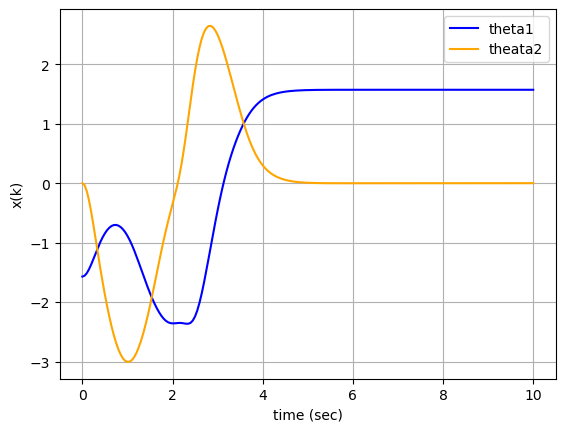

In [21]:
plot_x()

รูปที่ 5.2 แนววิถีเหมาะที่สุดของสถานะ $\theta_1$ และ $\theta_2$

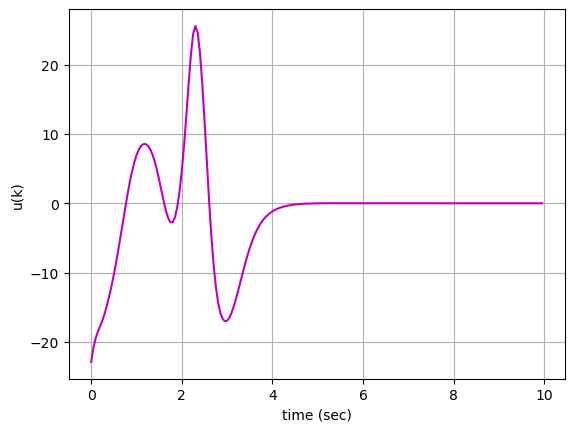

In [22]:
plot_u()

รูปที่ 5.3 แนววิถีเหมาะที่สุดของตัวควบคุม $u$ 

รันโค้ดในเซลล์ด้านล่างนี้ทั้งหมดเพื่อจำลองการเคลื่อนที่ของหุ่นยนต์กายกรรมโดย meshcat 
ดังเช่นในรูปที่ 5.4

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch5_acrobot_meshcat.png" width=400 />

รูปที่ 5.4 การจำลองหุ่นยนต์กายกรรมบน meshcat

(หากยังไม่ได้ติดตั้งต้องใช้คำสั่ง !pip install meshcat) 
ผลการจำลองจะมีลักษณะดังแสดงใน [วีดีโอนี้](https://youtu.be/qkP1aVt2a-8)

In [23]:
import meshcat
import meshcat.geometry as g
import meshcat.transformations as tf    
import time

In [24]:
vis = meshcat.Visualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [35]:
thick = 0.05
l1 = 1.0
l2 = 1.0

def build_acrobot(vis):
    acrobot = vis["acrobot"]
    base = acrobot["base"]
    pivot1 = acrobot["pivot1"]
    link1 = pivot1["link1"]
    pivot2 = link1["pivot2"]
    hinge = link1["hinge"]
    link2 = pivot2["link2"]
    base.set_object(g.Sphere(thick))
    link1.set_object(g.Box([l1,thick,thick]))
    link1.set_transform(tf.translation_matrix([-l1/2,0,0]))
    pivot2.set_transform(tf.translation_matrix([-l1/2,0,0]))
    link2.set_object(g.Box([l2,thick,thick]))
    link2.set_transform(tf.translation_matrix([-l1/2,0,0]))
    hinge.set_object(g.Sphere(thick))
    hinge.set_transform(tf.translation_matrix([-l1/2,0,0]))

    return pivot1, pivot2

# update acrobot pose
def update_acrobot(pivot1,pivot2,th1,th2):
    pivot1.set_transform(tf.rotation_matrix(th1,[0,1,0]))
    pivot2.set_transform(tf.translation_matrix([-l1/2,0,0]).dot(tf.rotation_matrix(th2,[0,1,0])))

def simulate_acrobot():
    for k in range(xtraj.shape[1]):
        th1 = xtraj[0,k]
        th2 = xtraj[1,k]
        update_acrobot(pv1,pv2,th1,th2)
        time.sleep(h)

In [26]:
pv1,pv2 = build_acrobot(vis)
update_acrobot(pv1,pv2,-np.pi/2,0)

In [36]:
simulate_acrobot()

จากการอนุพัทธ์ด้านบนและตัวอย่าง 5.1 สามารถสรุปโครงสร้างของอัลกอริทึม DDP ได้เป็นดังนี้

จากปัญหาการหาแนววิถีเหมาะที่สุดที่ไม่มีเงื่อนไขบังคับอสมการ กำหนดฟังก์ชันมูลค่า (5.1)
$$
\begin{align*}
\underset{\substack{x_{1:N} \\ u_{1:N-1}}}{min} \; J &=  \sum_{k=1}^{N-1} \; l_k(x_k,u_k) + l_N(x_N) \\
s.t. \;\; x_{k+1} &= f(x_k,u_k) 
\end{align*}
$$

#### อัลกอริทึม DDP

<hr>

<u>ขั้นการคำนวณย้อนหลัง</u>

จากการกระจายเทเลอร์กำลังสองของฟังก์ชันมูลค่ารายทาง (5.2)
$$
V_k(x + \Delta x) \approx V_k(x) + p_k^T\Delta x + \frac{1}{2}\Delta x^T P_k \Delta x 
$$

เริ่มจากขั้นสุดท้าย N คำนวณ $p_N, P_N$ จาก (5.3),(5.4)
$$
p_N = \nabla_x l_N(x) 
$$
$$
P_N = \nabla_{xx}^2 l_N(x) 
$$

คำนวณค่าที่เรียกว่า เบลแมนแบ็กอัป (Bellman backup)
$$
V_{N-1}(x + \Delta x) = \underset{\Delta u}{min} \;S(x+\Delta x, u + \Delta u))
$$

ได้การเปลี่ยนแปลงของตัวควบคุม (5.9)
$$
\Delta u_{k-1} = -d_{k-1} - K_{k-1} \Delta x_{k-1} 
$$

โดยมีพจน์ป้อนข้างหน้า $d_{k-1}$ เป็นค่าคงที่ ส่วนพจน์ป้อนกลับ $K_{k-1}$ เหมือนกับที่ได้จากปัญหา LQR 

แทนค่า $\Delta u_{k-1}$ กลับในฟังก์ชันมูลค่า จะได้ค่าเฮสเชียนและเกรเดียนต์ของฟังก์ชันมูลค่ารายทางในขั้นย้อนหลังถัดมาตาม (5.11), (5.12)
$$
P_{k-1} = G_{xx} + K_{k-1}^TG_{uu}K_{k-1} - G_{xu}K_{k-1} - K_{k-1}^TG_{ux} 
$$
$$
p_{k-1} = g_x - K_{k-1}^Tg_u + K_{k-1}^TG_{uu}d_{k-1} - G_{xu}d_{k-1} 
$$

โดย DDP ใช้การคำนวณเมทริกซ์ $G_{xx}, G_{xu} = G_{ux}^T, G_{uu}$ ตาม (5.15)-(5.17) 
คือใช้วิธีนิวตันเต็ม แต่หากละทิ้งพจน์เฮสเซียนสุดท้ายใน (5.15) - (5.17)คือวิธีเกาส์-นิวตัน เรียกว่า iLQR 
ซึ่งในการใช้งานจริงมักพบว่าใช้เวลาน้อยกว่าเนื่องจากการคำนวณพจน์เฮสเซียนจะต้องการการประมวลผลมาก 
นอกจากนั้นยังต้องมีการทำเรกูลาร์ไรเซชัน

<u>ขั้นการแผ่ไปข้างหน้า</u>

เราจะเขียนในรูปโค้ดเทียม โดยนิยามแนววิถีใหม่เป็น x', u' เริ่มจากขั้นแรกที่สถานะเริ่มต้นตามที่กำหนดไว้ 
 
```
dJ = 0
x'_1 = x_1
```

ดำเนินการแผ่ไปข้างหน้า สังเกตว่าในการค้นหาตามเส้น ค่า alpha จะคูณกับพจน์ป้อนข้างหน้า d_k เท่านั้น ไม่ใช้กับพจน์ป้อนกลับ K_k จากนั้นป้อน u'_k ให้กับพลวัตเพื่อคำนวณสถานะใหม่ และคำนวณค่าคาดหวังในการเปลี่ยนแปลงของมูลค่า dJ โดย gu_k คือเกรเดียนต์ของฟังก์ชันมูลค่าเทียบกับ u ประเมินที่ขั้นเวลา k เพื่อที่จะใช้การค้นหาตามเส้นโดยวิธีอามิโฮ (คือการคำนวณค่าคาดหวังของการลดมูลค่าภายใต้การประมาณค่าเชิงเส้น)
```
rollout()
    for k = 1:N-1
        u'_k = u - alpha*d_k - K_k*(x'_k - x_k)
        x'_k+1 = f(x'_k,u'_k)
        dJ <- dJ + alpha*gu_k*d_k

```
ขั้นต่อไปคือการค้นหาตามเส้นโดยวิธีอามิโฮที่ได้ศึกษาในบทที่ 2 คือดำเนินการแผ่ไปข้างหน้า rollout() 
และตรวจสอบหากไม่ได้ตามเงื่อนไขของอามิโฮ ลดค่า alpha ลงด้วยตัวประกอบการคูณ c 
จนกว่ามูลค่าใหม่จะมีค่าน้อยกว่ามูลค่าเดิมลบด้วยค่าคาดหวังคูณด้วยค่าเผื่อ b 
ค่าของ c โดยทั่วไปใช้ค่า 0.5 ส่วนสำหรับค่าเผื่อ b ใช้ค่าในช่วง 1e-4 - 0.01 
```
alpha = 1
do:
    x',u', dJ = rollout(x,u,d,K,alpha)
    while J(x',u') > J(x,u) - b*dJ
x,u <- x',u'
```

วนซ้ำทั้งหมดจนกว่า $|d|_\infty < tol$ หรือใช้เวลานานเกินกว่าที่กำหนด
<hr>

**ตัวอย่าง 5.2** 

ทดลองใช้อัลกอริทึม DDP/iLQR หาแนววิถีเหมาะที่สุดของคาร์ทโพลดังในรูปที่ 5.5
ในตัวอย่าง C.7 ภาคผนวก C ได้อธิบายพลวัตโดยสังเขป ในตัวอย่างนี้จะกำหนดพารามิเตอร์ให้สอดคล้องกับ [3] 

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/master/cart_pole.png" width=500 />
</div>
<div align="center">รูปที่ 5.5 ระบบคาร์ทโพลในระนาบ 2 มิติ</div>

นิยามตัวแปรชื่อ use_jax สำหรับเลือกแพ็กเกจการหาอนุพันธ์อัตโนมัติ โดยตั้งค่าเป็น False หรือ True 
เมื่อต้องการใช้ Drake หรือ JAX ตามลำดับ

In [67]:
use_jax = False

หลังจากตั้งค่าตัวแปร use_jax แล้วสามารถรันเซลล์ด้านล่างได้ทั้งหมด 
โดยในฟังก์ชันที่เกี่ยวข้องกับการหาอนุพันธ์อัตโนมัติจะมีเงื่อนไขที่ปรับโค้ดให้เหมาะสมสำหรับการใช้แพ็กเกจนั้น 
ตัวอย่างเช่นการเลือกใช้ numpy หรือ jax.numpy หรือการเลือก/ไม่เลือกโค้ดที่เรียกแพ็กเกจ JAX/Drake

แนวทางการเลือกใช้งาน 
* Drake จะคำนวณอนุพันธ์อัตโนมัติได้เร็วกว่า JAX 
แต่มีข้อจำกัดคือไม่สามารถคำนวณเฮสเชียนได้โดยใช้ฟังก์ชันที่มากับแพ็กเกจ 
ดังนั้นจึงใช้ได้แต่วิธี iLQR หากต้องการใช้วิธี DDP ในตัวอย่างนี้ไม่สามารถใช้ Drake 
(ผู้พัฒนาแนะแนวทางที่ค่อนข้างยุ่งยากเช่นใช้ symbolic ร่วมกับแพ็กเกจเสริมอื่นเช่น pytorch 
ซึ่งเห็นว่าเกินขอบเขตของเนื้อหาไปมาก) 

* JAX เขียนโค้ดง่ายกว่า ในฟังก์ชันที่มีการคำนวณอนุพันธ์ต้องใช้ jax.numpy แทน numpy 
ซึ่งทำงานช้ากว่า นอกจากนั้นการคำนวณอนุพันธ์อัตโนมัติใช้เวลามาก 
จึงต้องการคอมพิวเตอร์ที่สมรรถนะสูง ข้อดีอีกประการคือสามารถคำนวณเฮสเซียนได้ 
ดังนั้นจึงใช้ได้กับทั้งวิธี iLQR และ DDP

นำเข้าแพ็กเกจทั้งหมดที่ต้องการใช้

In [68]:
import numpy as np 
from numpy import kron
import matplotlib.pyplot as plt 
from scipy.linalg import block_diag
if use_jax:
    import jax
    import jax.numpy as jnp
    from jax. numpy.linalg import solve, eigvals
else:
    from numpy.linalg import solve
    from pydrake import forwarddiff
    from pydrake.autodiffutils import AutoDiffXd, ExtractGradient, ExtractValue, InitializeAutoDiff    

และเนื่องจากการใช้ jax.numpy จะประมวลผลช้ากว่า numpy เราจึงเพิ่มตัวแปรส่วนกลาง ad_flag 
เพื่อใช้ jax_numpy เฉพาะในกรณีคำนวณอนุพันธ์อัตโนมัติเท่านั้น โดยตั้ง ad_flag = True 
แต่ในกรณีคำนวณเอาต์พุตของฟังก์ชันปกติจะตั้งค่า ad_flag = False

In [38]:
ad_flag = False

นิยามค่าขั้นเวลา จำนวนสถานะและตัวควบคุม เวลาปลาย จำนวนขั้น และเวกเตอร์ขั้นเวลา เหมือนในตัวอย่างอื่นก่อนหน้านี้

In [3]:
h = 0.05  # time step. Defined above
Nx = 4     # number of state
Nu = 1     # number of controls
Tfinal = 5.0 # final time 
Nt = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(Nt-1),h)

นิยามเมทริกซ์น้ำหนักสำหรับมูลค่า ฟังก์ชันคำนวณมูลค่าขั้น มูลค่าปลาย และมูลค่ารวม

In [4]:
# Cost weights
Q = block_diag(1.0*np.eye(2), 1.0*np.eye(2))
R = 0.1
Qn = 100*np.eye(Nx) # large weight on terminal cost

def stage_cost(x,u):
    xbar = x-xgoal
    return 0.5*((xbar.T@Q@xbar) + R*u*u)    

def terminal_cost(x):
    xbar = x-xgoal
    return 0.5*xbar.T@Qn@xbar

def cost(xtraj, utraj):
    J = 0.0
    for k in range(Nt-1):
        J += stage_cost(xtraj[:,[k]],utraj[k])
    J += terminal_cost(xtraj[:,[Nt-1]])
    return J.item()


ฟังก์ชันคำนวณพลวัตของคาร์ทโพล หาปริพันธ์วิธีรุงเงอ คุตตา (่RK4)  

In [40]:
def cartpole(x, u):
    if use_jax and ad_flag:
        c = jnp.cos(x[1])  # cos(theta)
        s = jnp.sin(x[1])  # sin(theta)
    else:
        c = np.cos(x[1])  # cos(theta)
        s = np.sin(x[1])  # sin(theta)    
    # parameters. Changed to match RobotZoo's cartpole
    m_c = 1.0  # cart mass
    m_p = 0.2 # pendulum mass
    l = 0.5  # pole length
    g = 9.81  # gravity

    f1 = x[2]  # x_dot is the 3rd element of state vector
    f2 = x[3]  # theta_dot is the 4th element of state vector
    f3 = (1/(m_c + m_p*s**2))*(u + m_p*s*(l*x[3]**2+g*c))  
    f4 = (1/(l*(m_c + m_p*s**2)))*(-u*c - m_p*l*x[3]**2*c*s - (m_c+m_p)*g*s)  
    if use_jax and ad_flag:
        y = jnp.array([f1, f2, f3, f4]).reshape(4,1)
    else:
        y = np.array([f1, f2, f3, f4]).reshape(4,1)
        
    return y

In [6]:
def cartpole_rk4(x,u):
    #RK4 integration with zero-order hold on u
    x_1 = x
    f1 = cartpole(x, u)
    
    x_a = x.reshape(4,1)
    x_2 = x_a + 0.5*h*f1
    f2 = cartpole(x_2.flatten(), u)
    
    x_3 = x_a + 0.5*h*f2
    f3 = cartpole(x_3.flatten(), u)

    x_4 = x_a + 0.5*h*f3
    f4 = cartpole(x_4.flatten(), u)

    ft = x_a + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
    
    return ft

ฟังก์ชันในเซลล์ด้านล่างนี้เฉพาะสำหรับกรณีใช้ Drake (use_jax = False) 
คือการหาค่าอนุพันธ์ของฟังก์ชันที่อินพุตเป็นสเกลาร์และเอาต์พุตเป็นเวกเตอร์ เหมือนกับที่ใช้ในตัวอย่าง 5.1

In [10]:
def vecout_derivative(function, x):
    """Compute the derivative of the function evaluated at the scalar input x
    using Eigen's automatic differentiation.

    The function should be scalar-input and vector-output.
    """
    x_ad = AutoDiffXd(value=x, size=1, offset=0)
    y_ad = function(x_ad)
    y_derivative = ExtractGradient(y_ad)
    return y_derivative


ฟังก์ชันสำหรับคำนวณอนุพันธ์อัตโนมัติ โค้ดภายในถูกปรับให้ใช้งานได้ตามการตั้งค่า use_jax

In [41]:
def dfdx(x,u):
    global u_global, ad_flag
    u_global = u
    if use_jax:
        ad_flag = True
        y = jnp.squeeze(jax.jacfwd(cartpole_rk4,argnums=0)(x,u))
        ad_flag = False
    else:
        y = np.squeeze(forwarddiff.jacobian(cartpole_rk4_x,x.flatten()))
    return y

def dfdu(x,u):
    global x_global, ad_flag
    x_global = x
    if use_jax:
        ad_flag = True
        y = jax.jacfwd(cartpole_rk4,argnums=1)(x,u)
        ad_flag = False
    else:
        y = vecout_derivative(cartpole_rk4_u,u)    
    return y

# wrapper functions for Drake (use_jax = False)
def cartpole_rk4_x(x):
    # global u_global 
    return cartpole_rk4(x, u_global)

def cartpole_rk4_u(u):
    # global x_global 
    return cartpole_rk4(x_global.flatten(), u)    

นิยามฟังก์ชันเสริมสำหรับกรณี DDP โดยใช้ JAX ฟังก์ชันเหล่านี้จะไม่ถูกเรียกหาก use_jax = False 

**หมายเหตุ :** เนื่องจากวิธีใช้ฟังก์ชัน vec() ในภาคผนวก B เกิดความผิดพลาดในการหาอนุพันธ์อัตโนมัติโดย JAX 
ดังนั้นเราแก้ปัญหาโดยใช้วิธีการแปลงเทนเซอร์เป็นเมทริกซ์หลังจากได้เอาต์พุตแล้ว

In [42]:
# for DDP. use_jax=True
# convert [m,n,p] tensor to [m*n,p] matrix
def tensor2mat(Mat3d):
    dim3 = Mat3d.shape[2]
    M = Mat3d[:,:,0]
    for i in range(dim3-1):
        M = np.vstack((M,Mat3d[:,:,i+1]))
    return M

from scipy.sparse import csr_matrix
def comm(M):
    m, n = M.shape[0], M.shape[1]
    row  = np.arange(m*n)
    col  = row.reshape((m, n), order='F').ravel()
    data = np.ones(m*n, dtype=np.int8)
    T = csr_matrix((data, (row, col)), shape=(m*n, m*n))
    return T.toarray()

# this commutation matrix is constant. So just compute it once and use commA in the loop.
Amat = np.zeros((Nx,Nx))
commA = comm(Amat)

def is_pos_def(x): # check positive definite for regularization
    return np.all(eigvals(x) > 0)

# for DDP, to compute last term of (5.15) - (5.17)
def dAdx(x,u):
    global ad_flag
    ad_flag = True
    y = jax.jacfwd(dfdx)(x,u)
    ad_flag = False
    return tensor2mat(y)

def dBdx(x,u):
    global ad_flag
    ad_flag = True
    y = jax.jacfwd(dfdu)(x,u)
    ad_flag = False
    return jnp.squeeze(y)

def dAdu(x,u):
    global ad_flag
    ad_flag = True
    y = jax.jacfwd(dfdu)(x,u)
    ad_flag = False
    return tensor2mat(y)

def dBdu(x,u):
    global ad_flag
    ad_flag = True
    y = jax.jacfwd(dfdu,argnums=1)(x,u)
    ad_flag = False
    return y

นิยามฟังก์ชันแผ่ไปข้างหน้าเริ่มต้น initial_rollout()

In [44]:
def initial_rollout():
    global xtraj, ad_flag
    ad_flag = False
    for k in range(Nt-1):
        xtraj[:,[k+1]] = cartpole_rk4(xtraj[:,k], utraj[k])
    J = cost(xtraj, utraj)
    return J   

ฟังก์ชันคำนวณย้อนหลัง backward_pass() โดยมีอาร์กิวเมนต์สำหรับเลือกโหมด mode='ilqr' 
หรือ mode='ddp' ค่าโดยปริยายคือ 'ilqr' เพราะกรณี mode='ddp' ใช้ได้เฉพาะ use_jax=True เท่านั้น

In [43]:
def backward_pass(mode='ilqr'):
    global p,P,d,K,gx,gu,Gxx,Gxu,Gux,Guu,G, k,A,B,Ax,Bx,Au,Bu
    dJ = 0.0
    p[:,[Nt-1]] = Qn@(xtraj[:,[Nt-1]]-xgoal)
    P[:,:,Nt-1] = Qn
    
    for k in range(Nt-2,-1,-1):
        # Calculate derivatives
        q  = Q@(xtraj[:,[k]] - xgoal)
        r = R*utraj[k]

        A = dfdx(xtraj[:,[k]], utraj[k])
        B = dfdu(xtraj[:,[k]], utraj[k])

        gx = q + A.T@p[:,[k+1]]
        gu = r + B.T@p[:,[k+1]]


        if mode=='ddp' and use_jax:
            # DDP (full Newton) version works only with JAX autodiff
            Ax = dAdx(xtraj[:,[k]], utraj[k])
            Bx = dBdx(xtraj[:,[k]], utraj[k])
            Au = dAdu(xtraj[:,[k]], utraj[k])
            Bu = dBdu(xtraj[:,[k]], utraj[k])
            Gxx = Q + A.T@P[:,:,k+1]@A + kron(p[:,[k+1]].T,np.eye(Nx))@commA@Ax[:,:,0]
            Guu = R + B.T@P[:,:,k+1]@B + (kron(p[:,[k+1]].T, np.eye(Nu))@Bu)[0]
            Gxu = A.T@P[:,:,k+1]@B + kron(p[:,[k+1]].T,np.eye(Nx))@commA@Au[:,:,0]
            Gux = B.T@P[:,:,k+1]@A + kron(p[:,[k+1]].T, np.eye(Nu))@Bu
    
            beta = 0.1
            G = np.block([[Gxx, Gxu],[Gux, Guu]])
            while not is_pos_def(G):
                Gxx += beta*np.eye(Gxx.shape[0])
                Guu += beta*np.eye(Guu.shape[0])
                beta = 2*beta
                print("regularizing G")
                print("beta = "+str(beta))
        else:  # default to ilqr mode
            # iLQR (Gauss-Newton) version 
            Gxx = Q + A.T@P[:,:,k+1]@A
            Guu = R + B.T@P[:,:,k+1]@B
            Gxu = A.T@P[:,:,k+1]@B
            Gux = B.T@P[:,:,k+1]@A
            
        d[k] = solve(Guu,gu).item()
        K[:,:,k] = solve(Guu,Gux)

        p[:,[k]] = gx - K[:,:,k].T@gu + K[:,:,k].T@Guu*d[k] - Gxu*d[k]
        P[:,:,k] = Gxx + K[:,:,k].T@Guu@K[:,:,k] - Gxu@K[:,:,k] - K[:,:,k].T@Gux

        dJ += (gu.T*d[k]).item()
    return dJ

สุดท้ายคือนิยามฟังก์ชันแผ่ไปข้างหน้าโดยมีการค้นหาตามเส้น rollout_with_ls()

In [45]:
def rollout_with_ls():
    global xtraj, xn, un, Jn, alpha, ad_flag
    ad_flag = False
    xn[:,[0]] = xtraj[:,[0]]
    alpha = 1.0
    for k in range(Nt-1):
        un[k] = (utraj[k] - alpha*d[k] - np.dot(K[:,:,k],xn[:,[k]]-xtraj[:,[k]])).item()
        xn[:,[k+1]] = cartpole_rk4(xn[:,[k]],un[k])

    Jn = cost(xn,un)
    
    while np.isnan(Jn) or Jn > (J - (1e-2)*alpha*dJ):
        alpha = 0.5*alpha
        # print("alpha = "+str(alpha))
        for k in range(Nt-1):
            un[k] = (utraj[k] - alpha*d[k] - np.dot(K[:,:,k],xn[:,[k]]-xtraj[:,[k]])).item()
            xn[:,[k+1]] = cartpole_rk4(xn[:,[k]],un[k])
        Jn = cost(xn,un)    

เมื่อนิยามฟังก์ชันย่อยทั้งหมดแล้ว ประกอบกันเป็นฟังก์ชัน ddp() สำหรับอัลกอริทึม DDP  
การเลือกโหมดทำได้โดยใส่อาร์กิวเมนต์ดังนี้ 

**หมายเหตุ :** ตั้งค่าโดยปริยายเป็น 'ilqr' เพราะสามารถเลือกใช้ได้ทั้ง Drake และ JAX แต่กรณี 'ddp' ใช้ได้กับ JAX เท่านั้น

```python
ddp() # default to iLQR mode
ddp('ilqr') # iLQR mode
ddp('ddp') # DDP mode
```
โดยเอาต์พุตของเซลล์จะแสดงค่าอัพเดตทุกรอบสำหรับการใช้ JAX และทุก 10 รอบสำหรับ Drake 
ทั้งนี้เนื่องจากความเร็วที่ต่างกันค่อนข้างมาก

In [46]:
# DDP algorithm
def ddp(mode='ilqr'):
    global p,P,d,K,dJ,xtraj,utraj, gx, gu, Gxx, Guu, Gxu, Gux, iter, J, Jn, xn, un
    p = np.zeros((Nx,Nt))
    P = np.zeros((Nx, Nx, Nt))
    d = np.ones((Nt-1))
    K = np.zeros((Nu, Nx, Nt-1))
    dJ = 0.0
    
    xn = np.zeros((Nx,Nt))
    un = np.zeros((Nt-1))
    
    gx = np.zeros((Nx))
    gu = 0.0
    Gxx = np.zeros((Nx,Nx))
    Guu = 0.0
    Gxu = np.zeros((Nx))
    Gux = np.zeros((Nx))
    
    iter = 0
    while np.max(abs(d)) >2e-2: #1e-3:
        iter+=1
    
        # Backward pass
        dJ = backward_pass(mode)  
            
        # forward rollout with line search
        rollout_with_ls()
            
        # logging 
        if use_jax:  # jax is so slow, so print every iteration
            if (iter-1)%10 == 0:  # print heading every 10 iterations
                print("iter        J                  ΔJ                   |d|             α       ")
                print("-----------------------------------------------------------------------------")
            if (iter-1)%1 == 0: # print values every 1 iterations
                print("{}   {}    {}   {}    {} ".format(iter, J,
                                            dJ, np.max(abs(d)), alpha))
        else: # drake is faster. Print every 10 iterations
            if (iter-1)%100 == 0:  # print heading every 100 iterations
                print("iter        J                  ΔJ                   |d|             α       ")
                print("-----------------------------------------------------------------------------")
            if (iter-1)%10 == 0: # print values every 10 iterations
                print("{}   {}    {}   {}    {} ".format(iter, J,
                                            dJ, np.max(abs(d)), alpha))
            
        J = Jn
        xtraj = xn.copy()  # important! code xtraj = xn results in some bug difficult to find
        utraj = un.copy()

นิยามสถานะเริ่มต้น สถานะสุดท้าย และเวกเตอร์แนววิถี โดยเริ่มต้นที่ตำแหน่งสถานะพัก คือลูกตุ้มทิ้งลงในแนวดิ่ง $\theta = 0$ 
และตำแหน่งสุดท้ายคือลูกตุ้มตั้งตรง $\theta = \pi$ สำหรับค่าเริ่มต้นแนววิถีตัวควบคุม เราต้องให้เริ่มจากค่าสุ่มน้อยๆ 
เพื่อหลุดจากความเป็นสมมาตรเช่นเดียวกับหุ่นยนต์กายกรรมในตัวอย่าง 5.1 เพราะหากเริ่มจากศูนย์ทั้งหมดค่าเกรเดียนต์จะเป็นศูนย์ 
ทำให้ไม่สามารถตัดสินใจได้ว่าจะแกว่งขึ้นทางด้านซ้ายหรือขวา

In [69]:
x0 = np.array([0,0,0,0]).reshape(4,1)
xgoal = np.array([0,np.pi,0,0]).reshape(4,1)
xtraj = np.kron(np.ones((1,Nt)),x0)
utraj = np.random.rand(Nt-1)

คำนวณมูลค่าเริ่มต้น

In [70]:
J = initial_rollout()
J

2649.262242771998

ทดสอบอัลกอริทึมโดยรันเซลล์ด้านล่างนี้

In [71]:
ddp() # iLQR mode
# ddp('ddp') # DDP mode

iter        J                  ΔJ                   |d|             α       
-----------------------------------------------------------------------------
1   2649.262242771998    3769.1177010262395   48.98866121350126    1.0 
11   723.8178006149955    1.1905319008519288   1.2088644721112907    1.0 
21   714.0730686289616    0.8201166689468949   1.0141783741895647    1.0 
31   706.3797670538888    0.7082298289930191   0.938579351627015    1.0 
41   699.5286378034979    0.6536492524008009   0.9005575356057268    1.0 
51   693.0669162776188    0.6338882884007414   0.8801382609801106    1.0 
61   686.6920147619413    0.637664745316131   0.8896493320279422    1.0 
71   680.2102245186405    0.655257488899337   0.8856649124185034    1.0 
81   673.5191321440058    0.6788488475742861   0.9134891795114629    1.0 
91   666.5876813756727    0.7024483403048206   0.9233124566592541    1.0 
iter        J                  ΔJ                   |d|             α       
---------------------------------

เขียนฟังก์ชันสำหรับพล็อตค่าแนววิถีสถานะและตัวควบคุม

In [72]:
# plot states and control
def plot_x():
    plt.figure()
    plt.plot(thist,xtraj[0,:-1],"b-",thist,xtraj[1,:-1],'orange')
    plt.xlabel("time (sec)")
    plt.ylabel("x(k)")
    plt.legend(["x","theta"])
    plt.grid(True)
    plt.show()

def plot_u():
    plt.plot(thist[0:Nt-1],utraj,"m-")
    plt.xlabel("time (sec)")
    plt.ylabel("u(k)")
    plt.grid(True)
    plt.show()

เรียกฟังก์ชันเพื่อพล็อตค่าแนววิถีสถานะและตัวควบคุมดังแสดงในรูปที่ 5.6 และ 5.7 ตามลำดับ

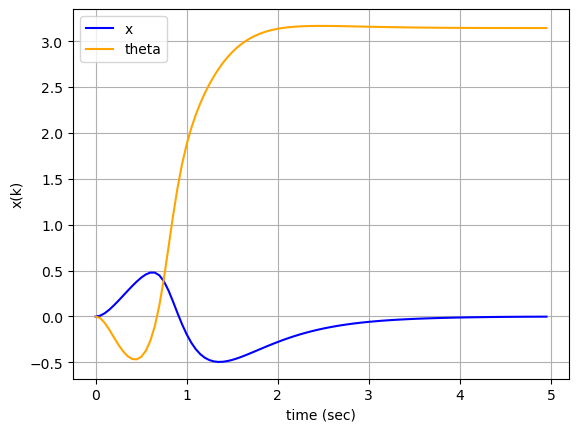

In [74]:
plot_x()

รูปที่ 5.6 แนววิถีสถานะเหมาะที่สุดของคาร์ทโพลจากอัลกอริทึม DDP

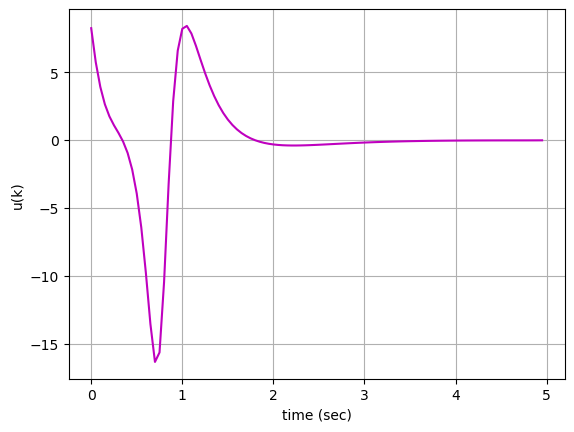

In [75]:
plot_u()

รูปที่ 5.7 แนววิถีตัวควบคุมเหมาะที่สุดของคาร์ทโพลจากอัลกอริทึม DDP

เราสามารถจำลองการเคลื่อนที่ของคาร์ทโพลอย่างง่ายบน meshcat โดยวิธีเหมือนกับในตัวอย่าง 5.1 
โดยสร้างโมเดลคาร์ทโพลดังในรูปที่ 5.8

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch5_cartpole_meshcat.png" width=400 />

รูปที่ 5.8 โมเดลจำลองคาร์ทโพลบน meshcat

In [76]:
import meshcat
import meshcat.geometry as g
import meshcat.transformations as tf
#from meshcat.animation import Animation
import time

In [77]:
vis = meshcat.Visualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [90]:
# create cartpole
def build_cartpole(vis):
    cart_pole = vis["cart_pole"]
    cart_pole.delete()
    cart = cart_pole["cart"]
    pivot = cart["pivot"]
    pole = pivot["pole"]
    pendulum = pole["pendulum"]
    cart.set_object(g.Box([0.5, 0.3, 0.2]))
    pole.set_object(g.Box([0.05, 0.05, 0.5]))
    pendulum.set_object(g.Sphere(0.06))
    pole.set_transform(tf.translation_matrix([0, 0, -0.25]))
    pendulum.set_transform(tf.translation_matrix([0.0,0.0,-0.25]))
    # pivot.set_transform(tf.rotation_matrix(-np.pi/2, [0, 1, 0]))
    return cart,pivot

# update cartpole pose
def update_cartpole(x,th):
    cart_th.set_transform(tf.rotation_matrix(th,[0,1,0]))
    cart_x.set_transform(tf.translation_matrix([x, 0, 0]))

def simulate_cartpole():
    for k in range(xtraj.shape[1]):
        x = xtraj[0,k] # cart position
        th = xtraj[1,k] # pole angle
        update_cartpole(x,th)
        time.sleep(h)    


In [94]:
cart_x, cart_th = build_cartpole(vis)

In [95]:
simulate_cartpole()

## บรรณานุกรม

1. D.Q. Mayne. "A second-order gradient method of optimizing non-linear discrete time systems". 
Int J Control. 3: 85–95. 1966.

2. D.Q. Mayne and D.H Jacobson. Differential dynamic programming. New York: American Elsevier 
Pub. Co. 1970.

3. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2025.

4. R.M. Murray and J. Hauser. "A case study in approximate linerization: the acrobot example". 
Memorandum No. UCB/ERL (unknown). 1991.  

5. R. Tedrake. [Underactuated Robotics: Algorithms for Walking, Running, Swimming, Flying, and Manipulation (Course Notes for MIT 6.832)](https://underactuated.csail.mit.edu). 2023. 


<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>